In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


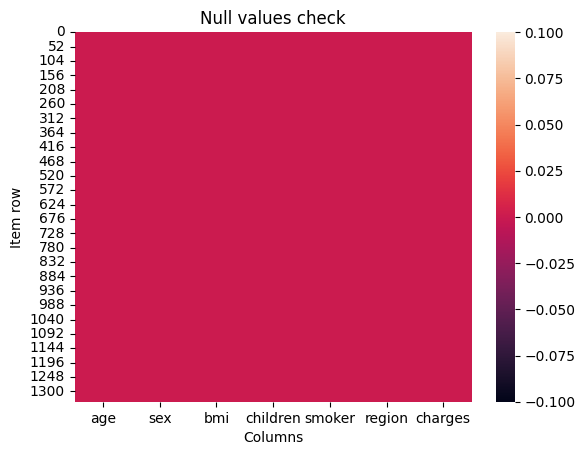

In [7]:
sns.heatmap(df.isnull())
pl.title("Null values check")
pl.xlabel("Columns")
pl.ylabel("Item row")
pl.show()

<Axes: ylabel='Frequency'>

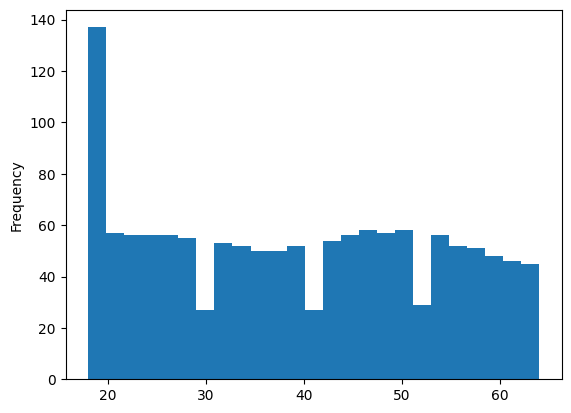

In [8]:
df['age'].plot(kind='hist',bins=25)

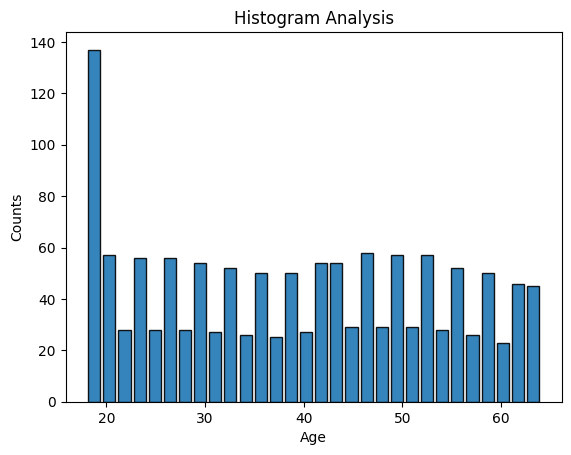

In [9]:
pl.hist(df['age'],
        bins=30, #Number of bins
        edgecolor='black', #color of bin edges
        linewidth=1, # Width of a bins edge
        alpha=0.9, # Transparency
        orientation='vertical',
        rwidth=0.8, # width of a bin
        align='mid'
       )
pl.title("Histogram Analysis")
pl.xlabel("Age")
pl.ylabel("Counts")
pl.show()

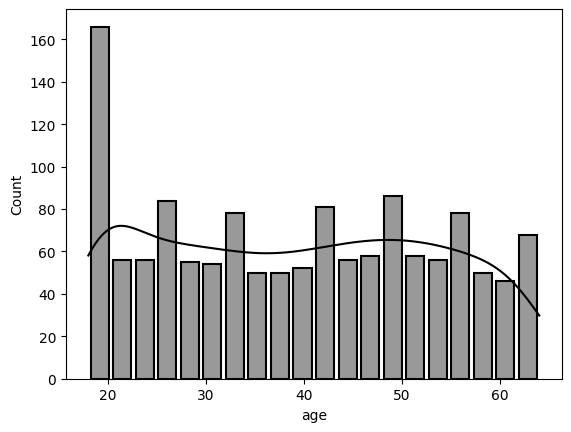

In [10]:
sns.histplot(df['age'],
            bins=20,
            kde=True,
             color='black',
             edgecolor='black',
             linewidth=1.5,
             alpha=0.4,
             stat='count',
             shrink=0.8,
             fill=True
            )
pl.show()

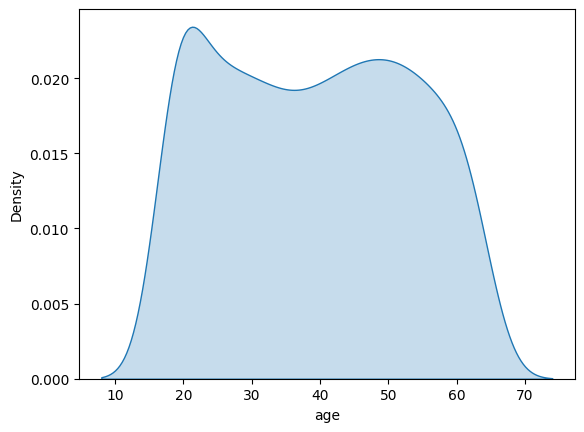

In [11]:
# Density Plot

sns.kdeplot(df['age'],
           fill=True
           )
pl.show()

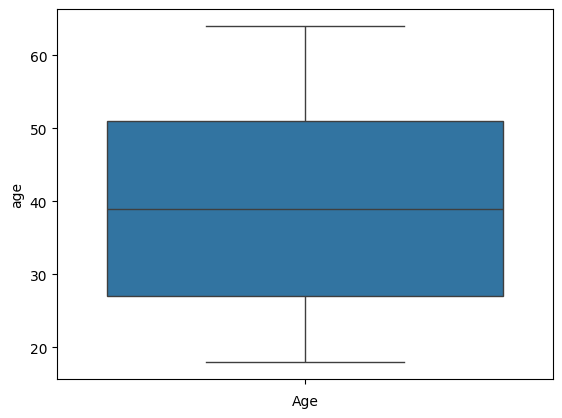

In [12]:
sns.boxplot(df['age'],orient='v') # h,v
pl.xlabel("Age")
pl.show()

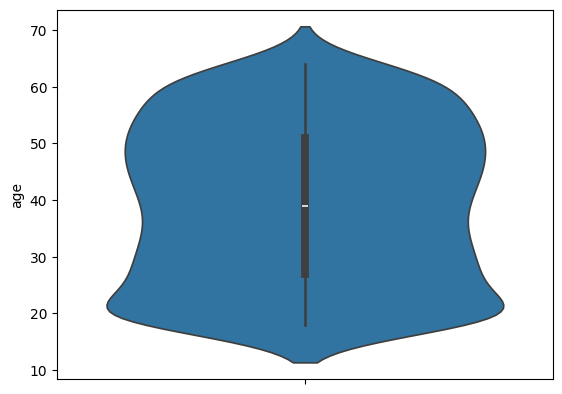

In [13]:
sns.violinplot(df['age'])
pl.show()

In [14]:
df[(df['age']>0) & (df['age']<40)].shape

(674, 7)

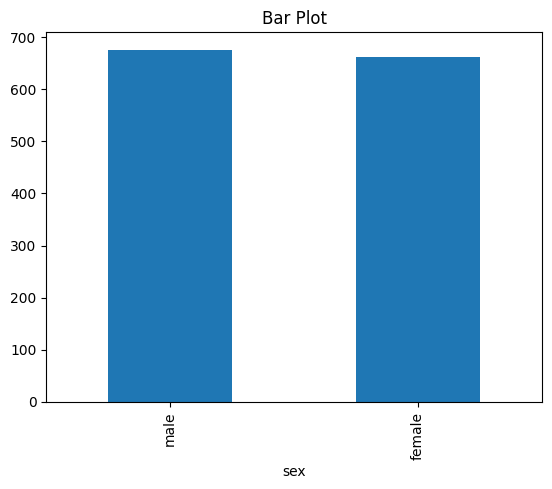

In [15]:
df['sex'].value_counts().plot(kind='bar')
pl.title("Bar Plot")
pl.show()

<Axes: ylabel='proportion'>

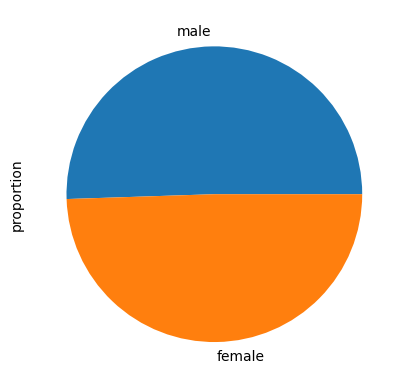

In [16]:
df['sex'].value_counts(normalize=True).plot(kind='pie')

In [17]:
df['sex'].value_counts(normalize=True),df['sex'].value_counts(normalize=False)

(sex
 male      0.505232
 female    0.494768
 Name: proportion, dtype: float64,
 sex
 male      676
 female    662
 Name: count, dtype: int64)

/var/folders/bh/vf1fwmq12t52g02tdc74rv780000gn/T/ipykernel_4497/3507231775.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pl.text(i, counts[i] +10, str(counts[i]), ha='center')


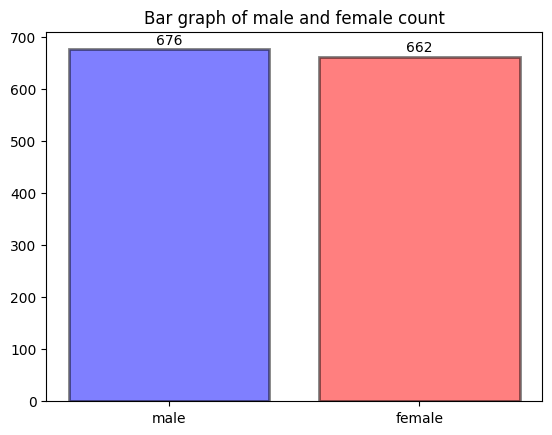

In [18]:
categories = ['male','female']
counts = df['sex'].value_counts()
colors = ['blue','red']
pl.bar(x=categories,
       height=counts,
       color=colors,
       edgecolor='black',
       linewidth=2,
       alpha=0.5
      )
pl.title("Bar graph of male and female count")
for i in range(len(categories)):
    pl.text(i, counts[i] +10, str(counts[i]), ha='center')
pl.show()

In [19]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

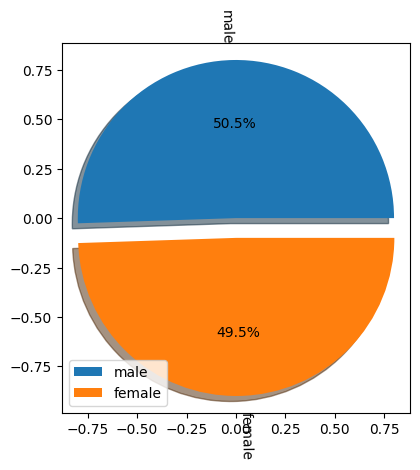

In [20]:
pl.pie(counts,
      labels=categories,
       explode=[0,0.1],
       shadow=True,
       radius=0.8,
       counterclock=True,
       frame=True,
      autopct='%1.1f%%',
       rotatelabels=True
      )
pl.legend()
pl.show()

/var/folders/bh/vf1fwmq12t52g02tdc74rv780000gn/T/ipykernel_4497/1141390240.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=df,palette='hls')


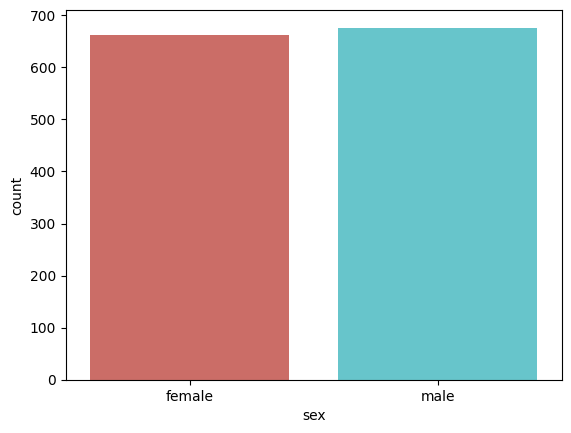

In [21]:
sns.countplot(x='sex',data=df,palette='hls')
pl.show()

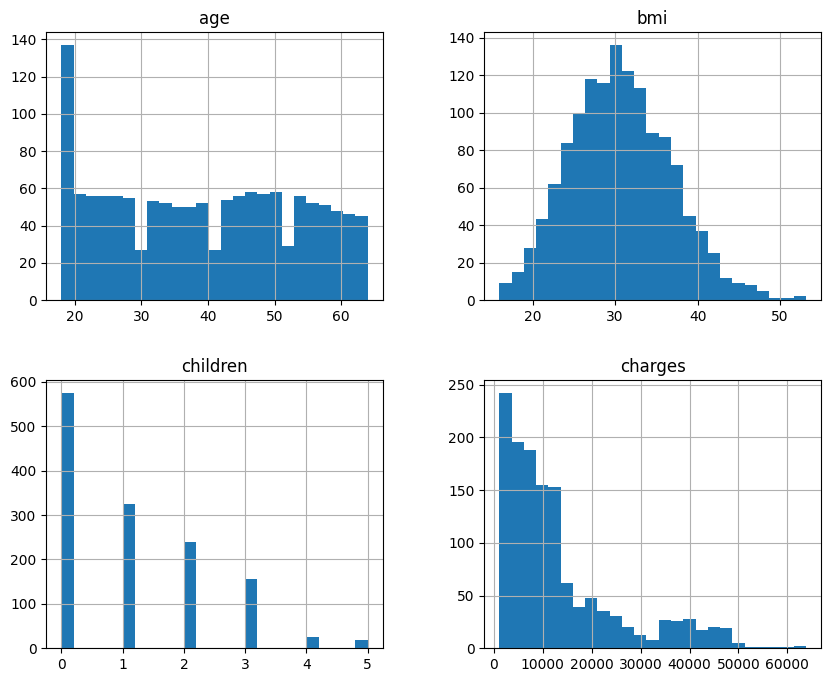

In [22]:
df.hist(bins=25,figsize=(10,8))
pl.show()

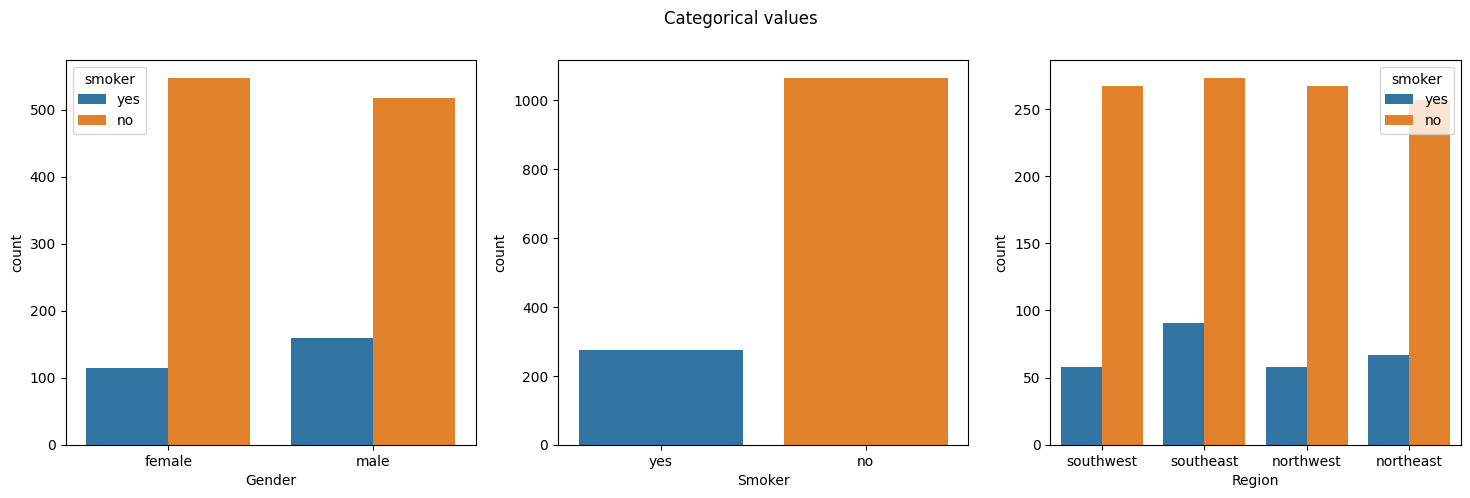

In [23]:
pl.figure(figsize=(18,5))
pl.subplot(1,3,1)

sns.countplot(x='sex',data =df,hue='smoker')
pl.xlabel('Gender')

pl.subplot(1,3,2)
sns.countplot(x='smoker',data=df,hue='smoker')
pl.xlabel('Smoker')

pl.subplot(1,3,3)
sns.countplot(x='region',data = df,hue='smoker')
pl.xlabel('Region')

pl.suptitle('Categorical values')
pl.show()

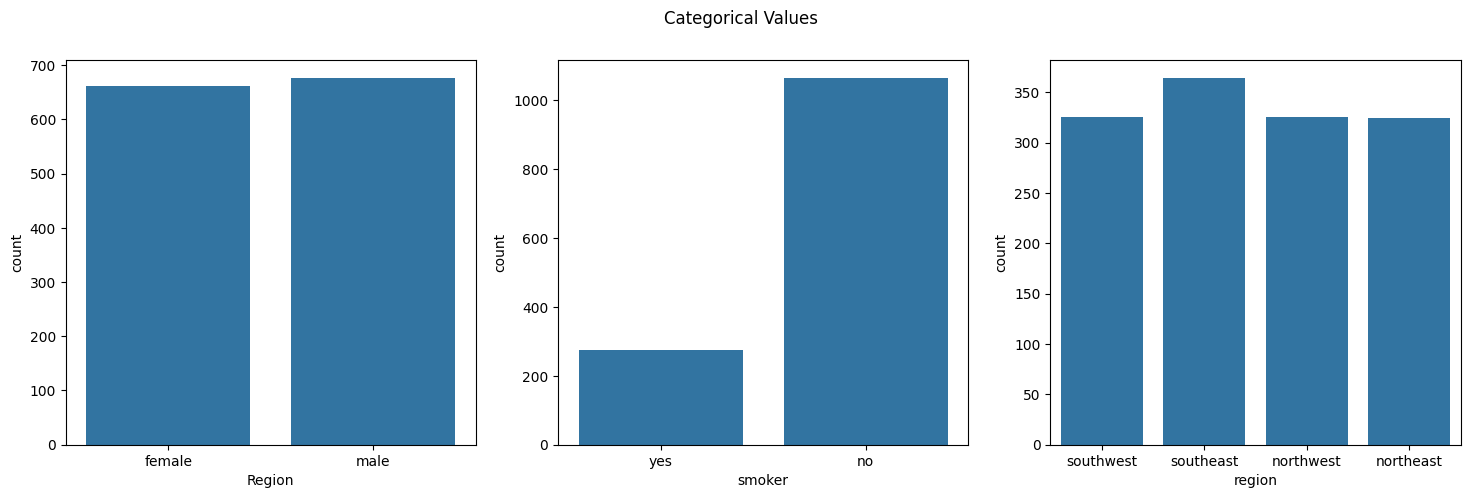

In [24]:
fig,axes = pl.subplots(1,3,figsize=(18,5))

sns.countplot(ax=axes[0],x='sex',data = df)
axes[0].set_xlabel('Gender')

sns.countplot(ax=axes[1],x='smoker',data = df)
axes[0].set_xlabel('Smoker')

sns.countplot(ax=axes[2],x='region',data = df)
axes[0].set_xlabel('Region')

fig.suptitle('Categorical Values')
pl.show()

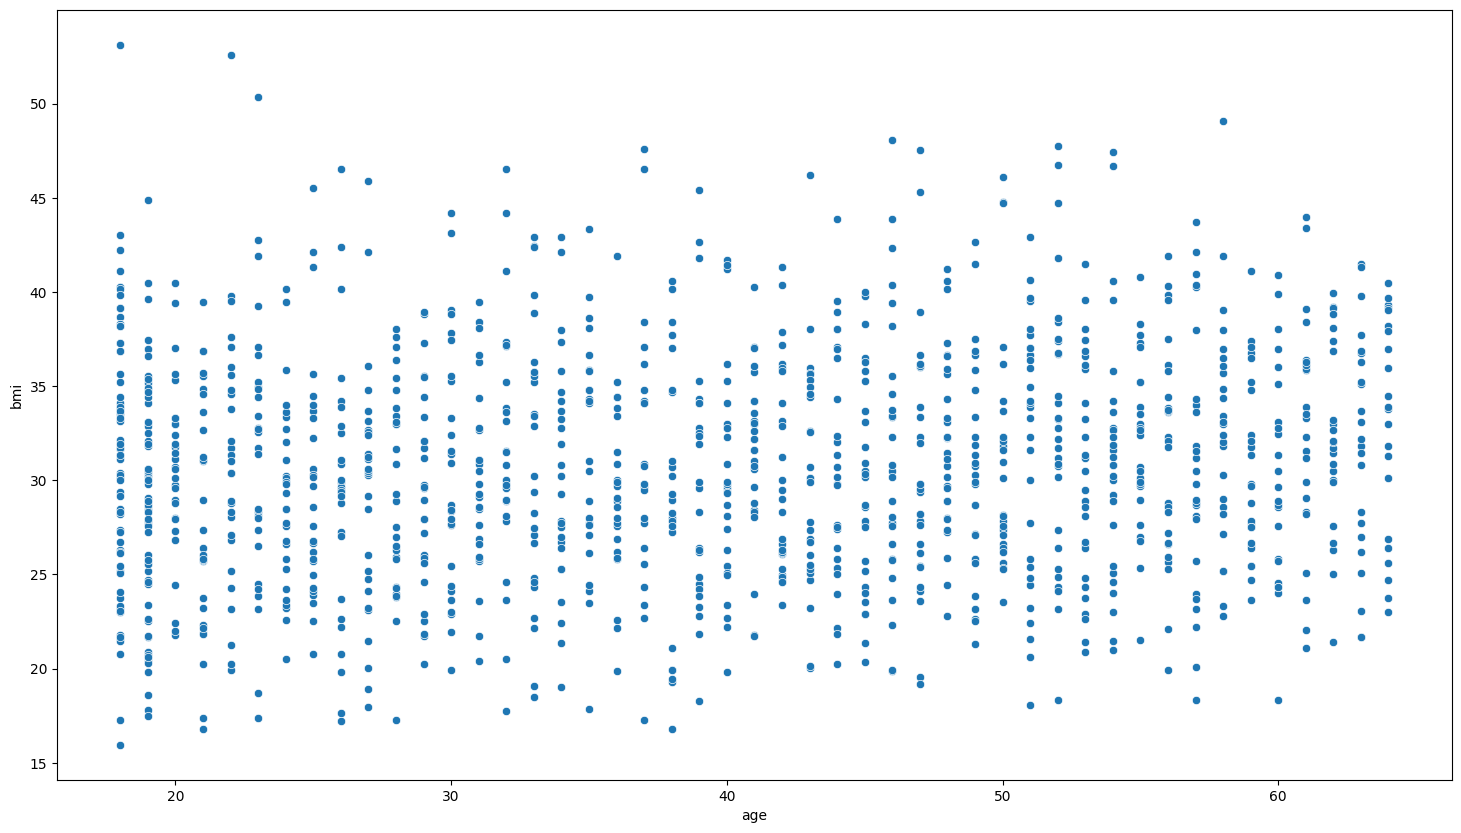

In [25]:
pl.figure(figsize=(18,10))
sns.scatterplot(x='age',y='bmi',data=df)
pl.show()

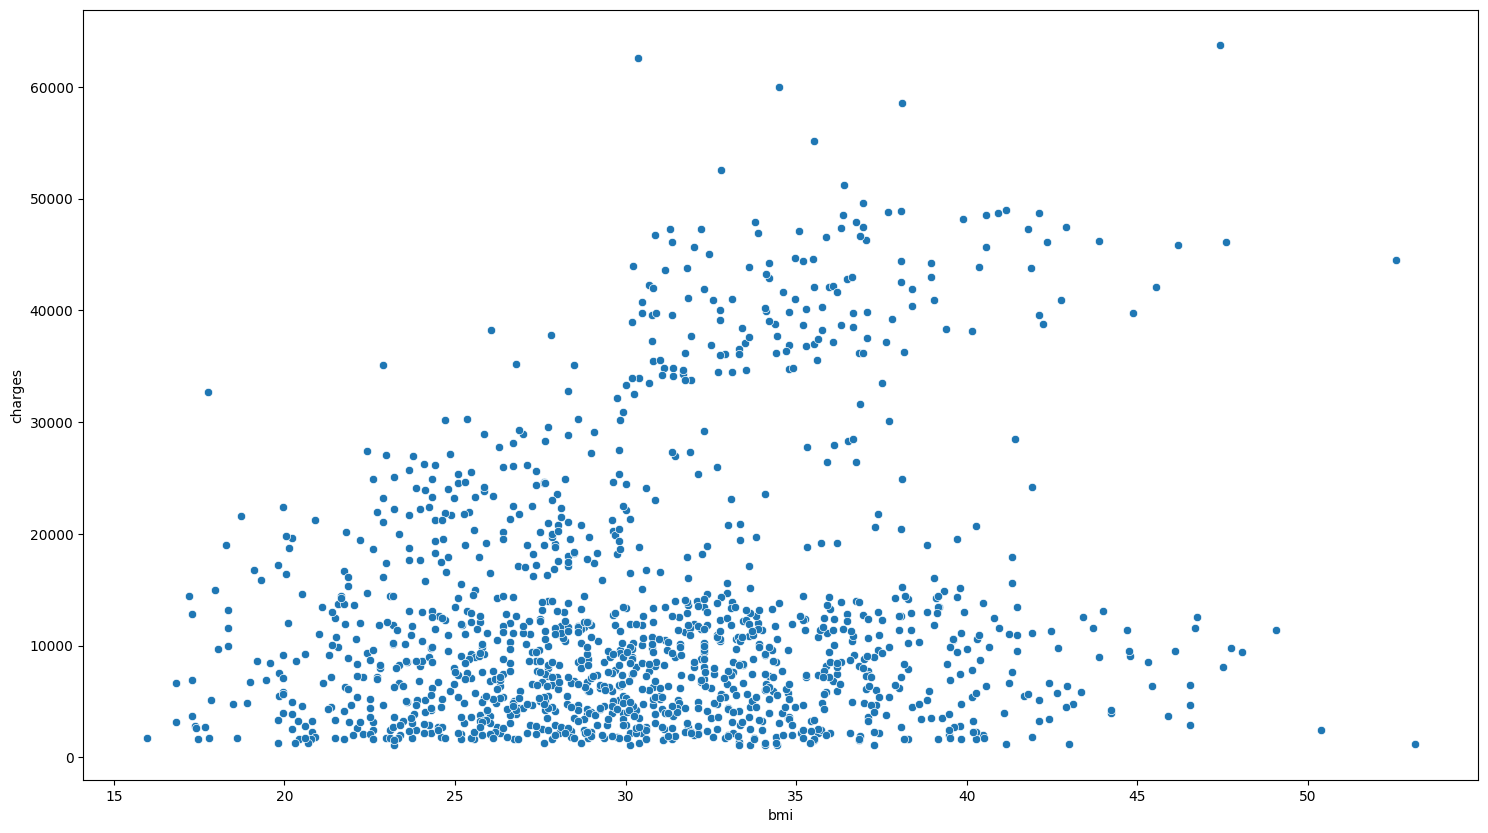

In [26]:
pl.figure(figsize=(18,10))
sns.scatterplot(x='bmi',y='charges',data=df)
pl.show()

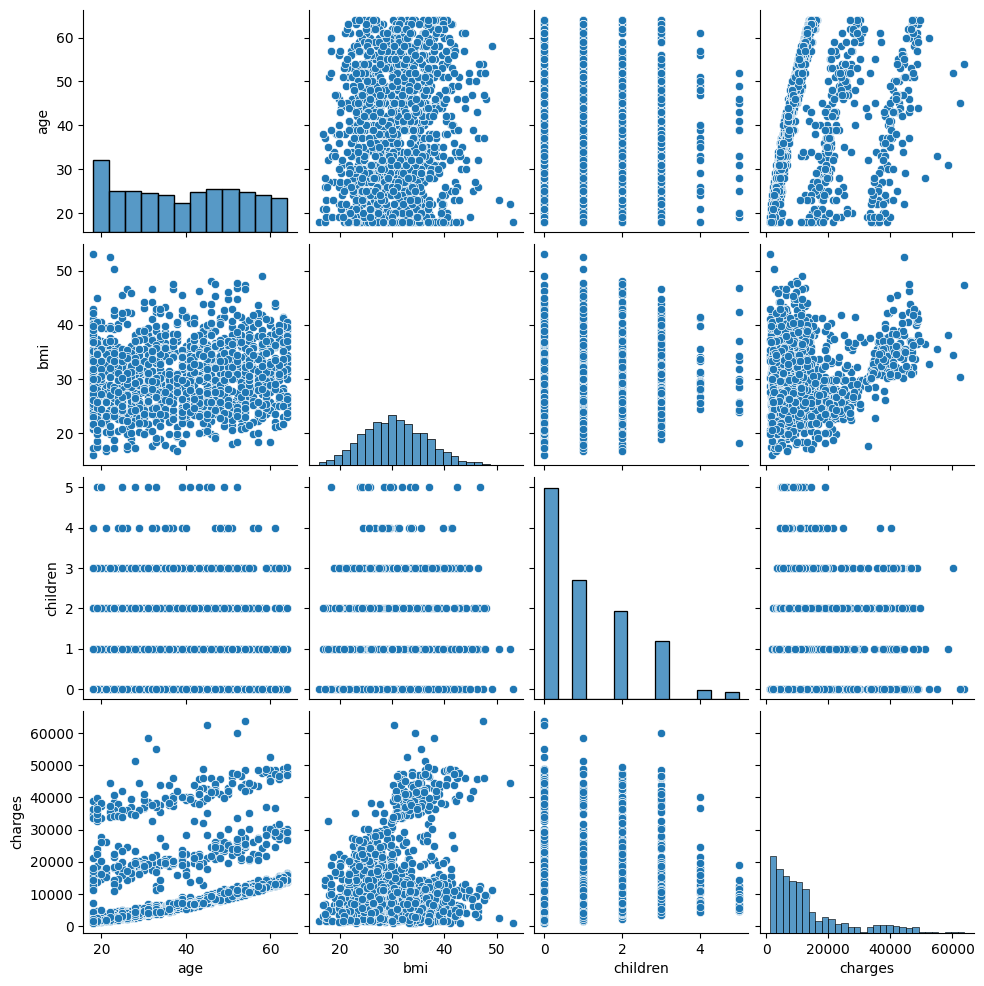

In [27]:
sns.pairplot(data=df)
pl.show()

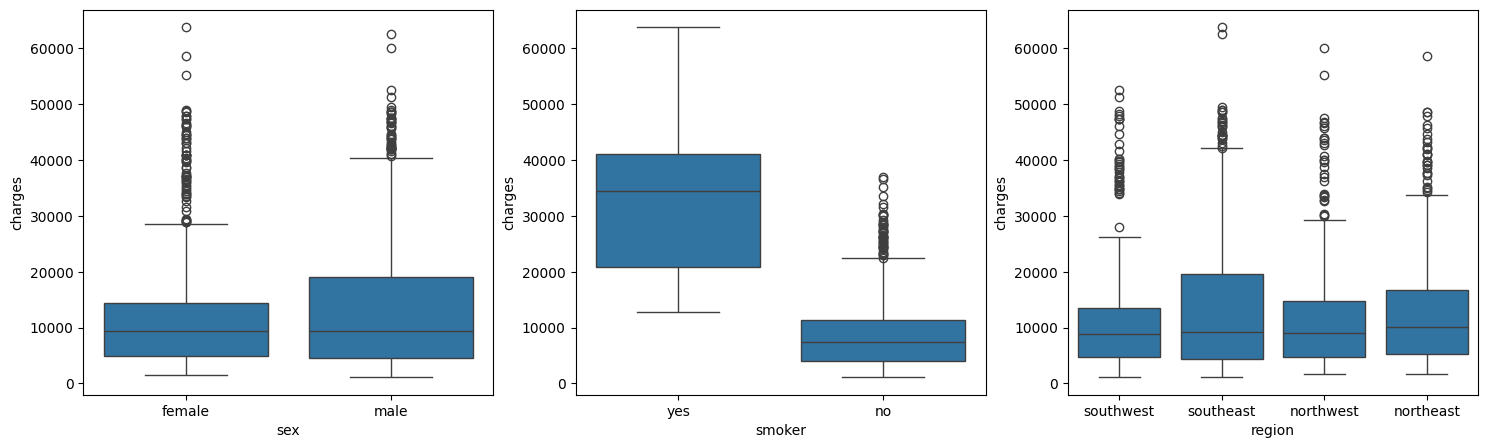

In [28]:


# Box plots to visualize charges by different groups
fig, axes = pl.subplots(1, 3, figsize=(18, 5))
sns.boxplot(ax=axes[0], x='sex', y='charges', data=df)
sns.boxplot(ax=axes[1], x='smoker', y='charges', data=df)
sns.boxplot(ax=axes[2], x='region', y='charges', data=df)
pl.show()



<Axes: xlabel='age', ylabel='charges'>

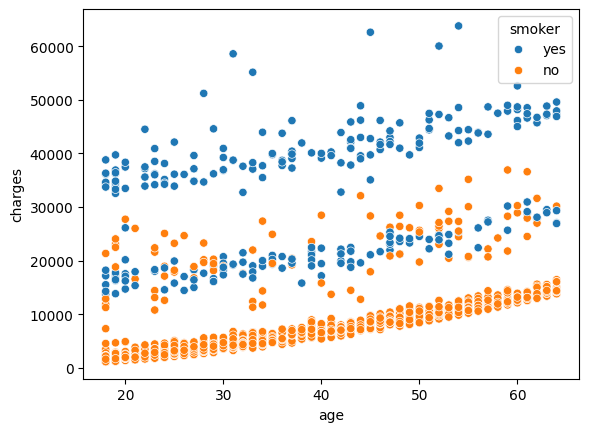

In [29]:
sns.scatterplot(x='age',y='charges',hue='smoker',data=df)

<Axes: xlabel='age', ylabel='charges'>

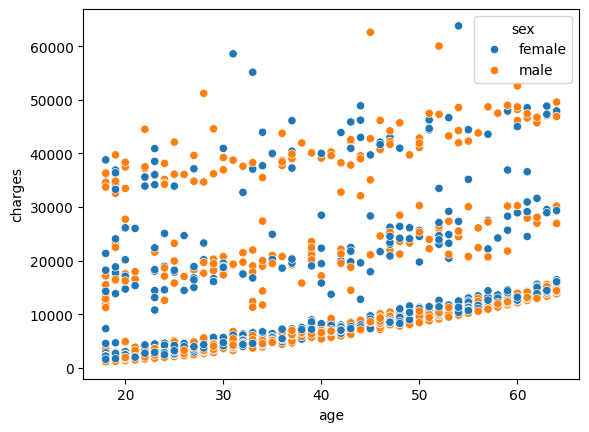

In [30]:
sns.scatterplot(x='age',y='charges',hue='sex',data=df)

<Axes: xlabel='age', ylabel='charges'>

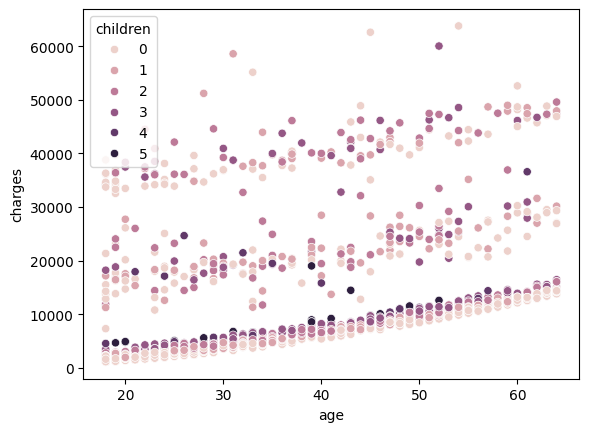

In [31]:
sns.scatterplot(x='age',y='charges',hue='children',data=df)

<Axes: xlabel='age', ylabel='charges'>

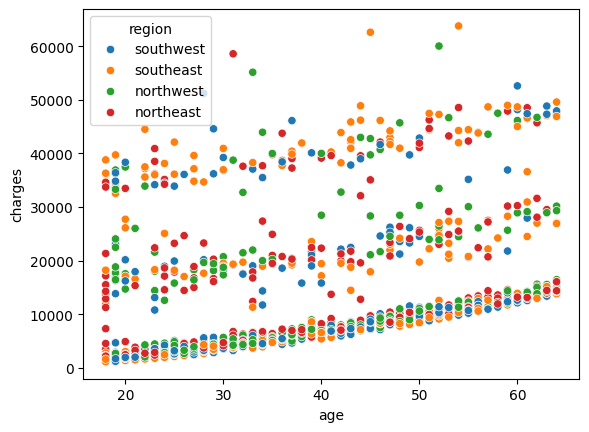

In [32]:
sns.scatterplot(x='age',y='charges',hue='region',data=df)

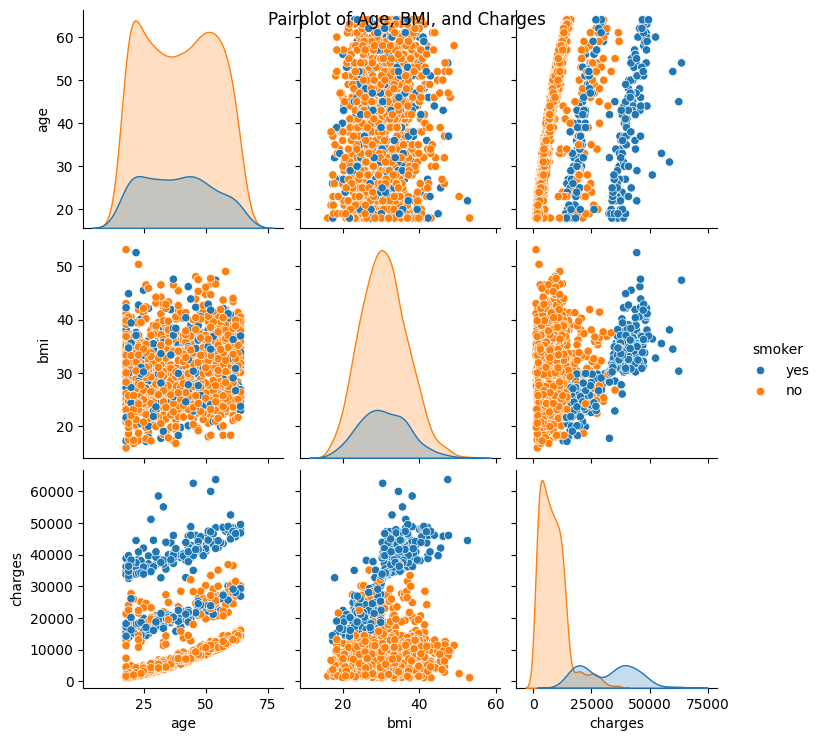

In [33]:


sns.pairplot(df, vars=['age', 'bmi', 'charges'], hue='smoker')
pl.suptitle('Pairplot of Age, BMI, and Charges')
pl.show()



In [34]:
#Analysis and comparison

/var/folders/bh/vf1fwmq12t52g02tdc74rv780000gn/T/ipykernel_4497/2630707331.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],color='deepskyblue',bins=100)


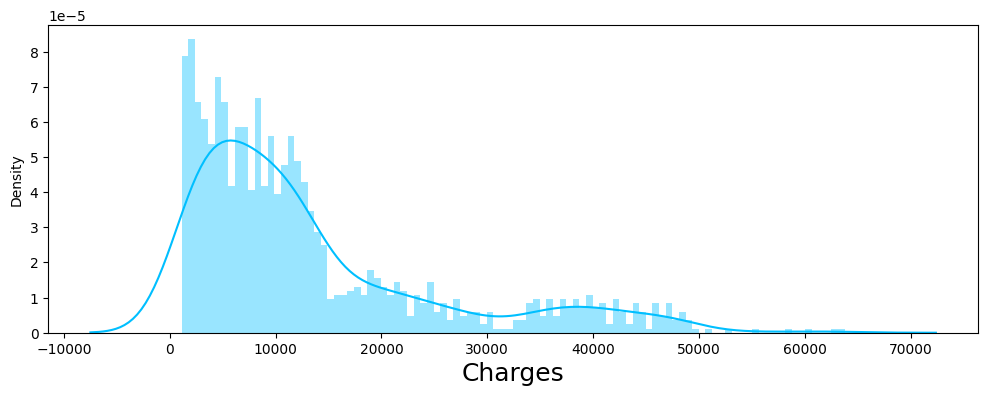

In [44]:
pl.figure(figsize=(12,4))
sns.distplot(df['charges'],color='deepskyblue',bins=100)
pl.xlabel('Charges',size=18)
pl.show()

In [45]:
# Left skewed i.e most of the charge is between 2k to 15k

In [49]:
df['charge_bins'] = pd.cut(df['charges'],bins=[0,15000,30000,45000,60000,75000])
df.head()

,age,sex,bmi,children,smoker,region,charges,charge_bins
0,19,female,27.900,0,yes,southwest,16884.92400,"(15000, 30000]"
1,18,male,33.770,1,no,southeast,1725.55230,"(0, 15000]"
2,28,male,33.000,3,no,southeast,4449.46200,"(0, 15000]"
3,33,male,22.705,0,no,northwest,21984.47061,"(15000, 30000]"
4,32,male,28.880,0,no,northwest,3866.85520,"(0, 15000]"


In [52]:
pd.cut([5,11,22],bins=[1,10,20,30])

[(1, 10], (10, 20], (20, 30]]
Categories (3, interval[int64, right]): [(1, 10] < (10, 20] < (20, 30]]

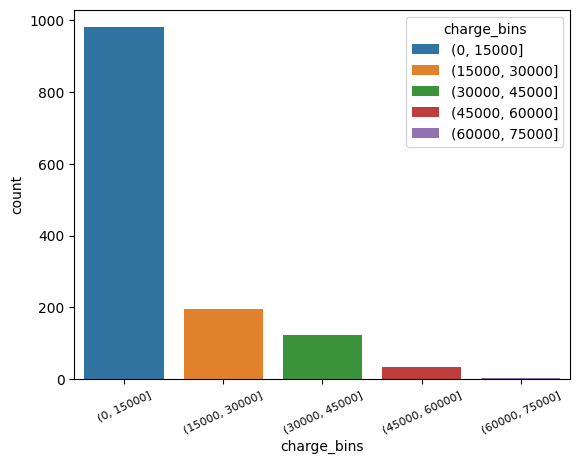

In [74]:
sns.countplot(x='charge_bins',data = df,hue='charge_bins')
pl.xticks(rotation=25,size=8)
pl.show()

In [75]:
# most people paid less than 15k for medical cost. lets analyze more

/var/folders/bh/vf1fwmq12t52g02tdc74rv780000gn/T/ipykernel_4497/2458495491.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],color='deepskyblue',bins=100)


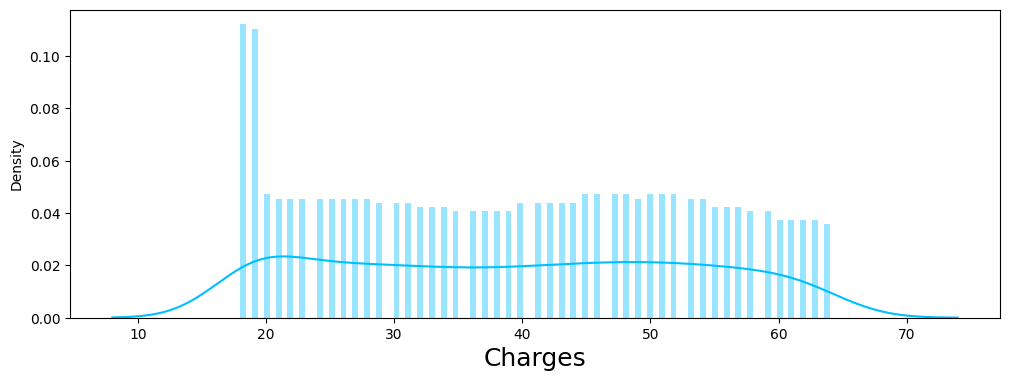

In [77]:
pl.figure(figsize=(12,4))
sns.distplot(df['age'],color='deepskyblue',bins=100)
pl.xlabel('Charges',size=18)
pl.show()

In [78]:
# uniform distribution

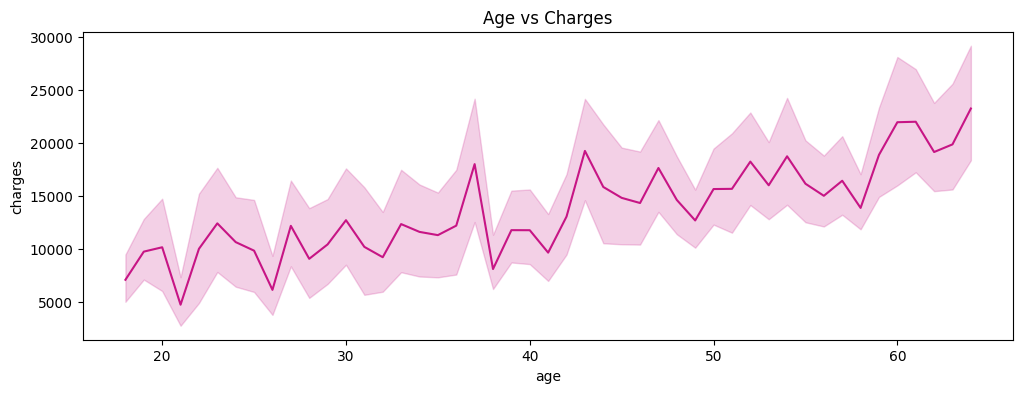

In [81]:
pl.figure(figsize=(12,4))
sns.lineplot(x='age',y='charges',data = df,color='mediumvioletred')
pl.title("Age vs Charges")
pl.show()

In [ ]:
# charge increases as age increases

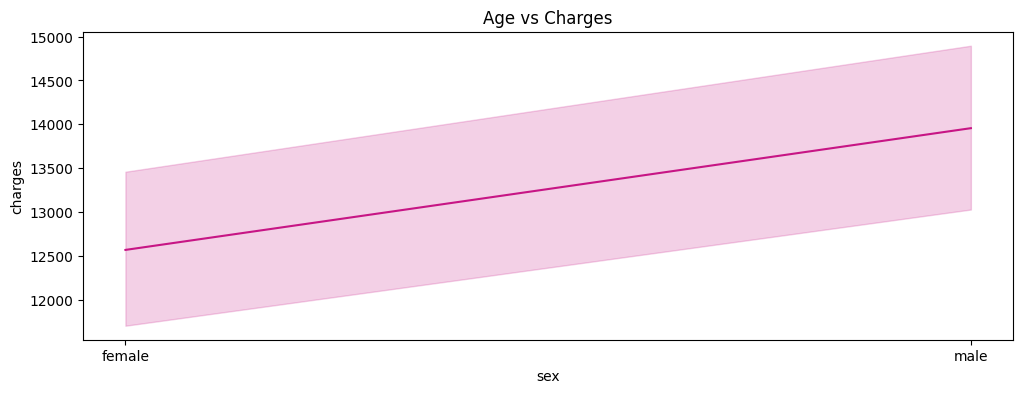

In [85]:
pl.figure(figsize=(12,4))
sns.lineplot(x='sex',y='charges',data = df,color='mediumvioletred')
pl.title("Age vs Charges")
pl.show()

In [82]:
df.head()

,age,sex,bmi,children,smoker,region,charges,charge_bins
0,19,female,27.900,0,yes,southwest,16884.92400,"(15000, 30000]"
1,18,male,33.770,1,no,southeast,1725.55230,"(0, 15000]"
2,28,male,33.000,3,no,southeast,4449.46200,"(0, 15000]"
3,33,male,22.705,0,no,northwest,21984.47061,"(15000, 30000]"
4,32,male,28.880,0,no,northwest,3866.85520,"(0, 15000]"


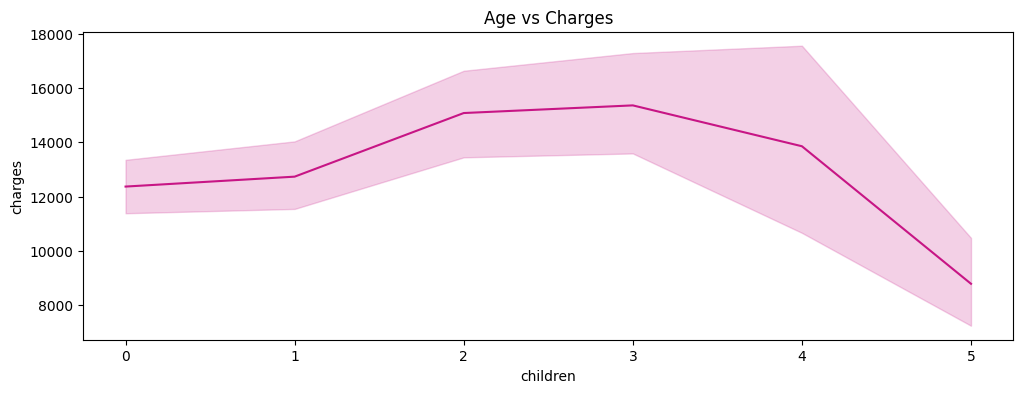

In [86]:
pl.figure(figsize=(12,4))
sns.lineplot(x='children',y='charges',data = df,color='mediumvioletred')
pl.title("Age vs Charges")
pl.show()

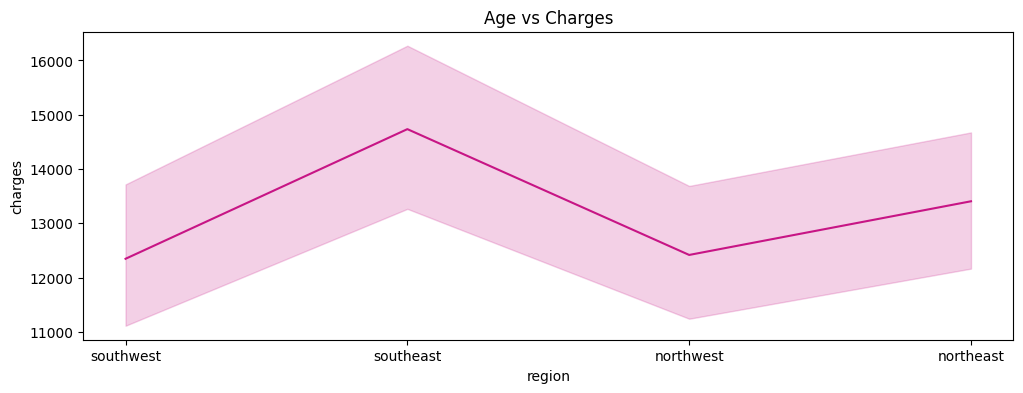

In [87]:
pl.figure(figsize=(12,4))
sns.lineplot(x='region',y='charges',data = df,color='mediumvioletred')
pl.title("Age vs Charges")
pl.show()

In [89]:
df['age_bins'] = pd.cut(df['age'],bins=[0,20,35,50,70])

df.head()

,age,sex,bmi,children,smoker,region,charges,charge_bins,age_bins
0,19,female,27.900,0,yes,southwest,16884.92400,"(15000, 30000]","(0, 20]"
1,18,male,33.770,1,no,southeast,1725.55230,"(0, 15000]","(0, 20]"
2,28,male,33.000,3,no,southeast,4449.46200,"(0, 15000]","(20, 35]"
3,33,male,22.705,0,no,northwest,21984.47061,"(15000, 30000]","(20, 35]"
4,32,male,28.880,0,no,northwest,3866.85520,"(0, 15000]","(20, 35]"


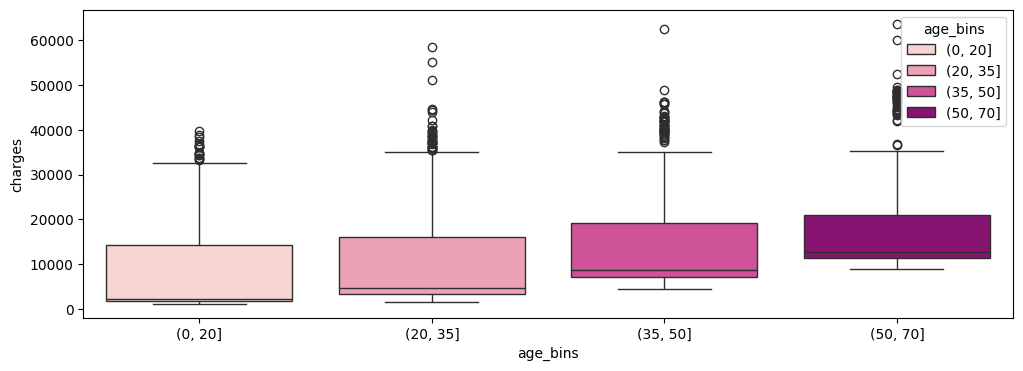

In [99]:
pl.figure(figsize=(12,4))
sns.boxplot(x='age_bins',y='charges',data=df,hue='age_bins',palette='RdPu')

pl.show()


In [101]:
# older people pays more. the mean of what they pay is still more than all other age groups

/var/folders/bh/vf1fwmq12t52g02tdc74rv780000gn/T/ipykernel_4497/595162368.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pl.text(i, counts[i]-100, str(counts[i]), ha='center',size=20)


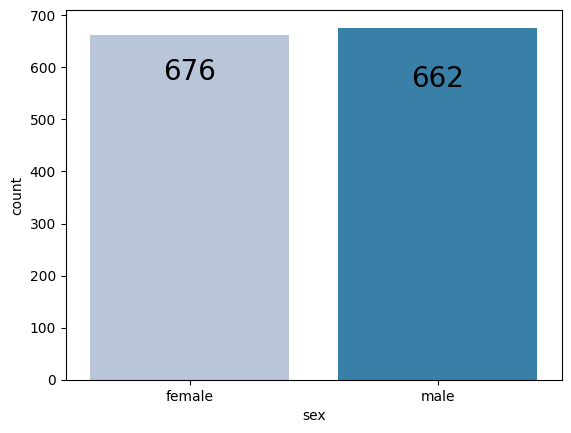

In [120]:
sns.countplot(x='sex',data=df,hue='sex',palette='PuBu')
for i in range(2):
    pl.text(i, counts[i]-100, str(counts[i]), ha='center',size=20)
pl.show()